In [1]:
%matplotlib inline
import pandas as pd

# Processing time with `pandas`

Let's open up some data from [the Census bureau](https://www.census.gov/econ/currentdata/datasets/) - we're going to use **New Home Sales**. The data is formatted... oddly, so I've cleaned it up for you as **home-sales.csv** inside of the **data** folder.

Open it **without moving it**. Tab autocomplete will help you.

In [2]:
df = pd.read_csv('data/home-sales.csv')
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
0,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
2,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
3,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
4,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01


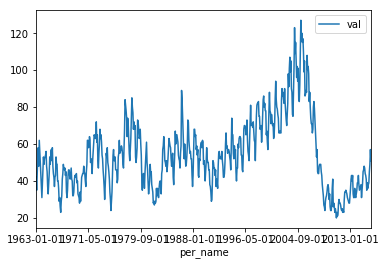

In [3]:
df.plot(x = 'per_name', y = 'val')

## Creating a datetime column

In [4]:
df.per_name.head()

0    1963-01-01
1    1963-02-01
2    1963-03-01
3    1963-04-01
4    1963-05-01
Name: per_name, dtype: object

In [5]:
#To Date Time: You have a string and you want to treat it as a datetime 
%time
pd.to_datetime(df.per_name).head()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


0   1963-01-01
1   1963-02-01
2   1963-03-01
3   1963-04-01
4   1963-05-01
Name: per_name, dtype: datetime64[ns]

In [6]:
#notice how it changed the dtype 

In [7]:
# Let's format things correctly :) http://strftime.org/ 
pd.to_datetime(df.per_name, format="%Y-%m-%d").head()

0   1963-01-01
1   1963-02-01
2   1963-03-01
3   1963-04-01
4   1963-05-01
Name: per_name, dtype: datetime64[ns]

In [8]:
df['date'] = pd.to_datetime(df.per_name, format="%Y-%m-%d") 
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name,date
0,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01,1963-01-01
1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01,1963-02-01
2,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01,1963-03-01
3,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01,1963-04-01
4,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01,1963-05-01


In [9]:
#we have two columns with different types of data( object vs. datetime )
df.dtypes

is_adj                 int64
val                  float64
cat_code              object
cat_desc              object
cat_indent             int64
dt_code               object
dt_desc               object
dt_unit               object
geo_code              object
geo_desc              object
per_name              object
date          datetime64[ns]
dtype: object

## Changing the index to the datetime

Normally the index of the column is just a number.

In [10]:
#everything in the column that you are setting as the index has to be unique :) 
df.set_index('date', inplace=True)
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
1963-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
1963-04-01,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
1963-05-01,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01


It's the column on the far left - `0`, `1`, `2`, `3`, `4`... boring and useless! If we use **.set_index** to replace the index with the datetime, though, we can start to have some fun

Be sure you use `inplace=True` or else it won't save the new index!

## Selecting specific(-ish) dates via the index

Now that our index is a datetime, we can select date ranges super super easily.

### Selecting by month

In [11]:
#select every February 
#old way - df.per_name.str.contains("-2-").value_counts()

In [12]:
df[df.index.month ==2]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
1964-02-01,0,46.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-02-01
1965-02-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-02-01
1966-02-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1966-02-01
1967-02-01,0,32.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1967-02-01
1968-02-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1968-02-01
1969-02-01,0,40.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1969-02-01
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1971-02-01,0,49.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1971-02-01


In [13]:
#over the entire summer 
df[df.index.month.isin([6,7,8])]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-06-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-06-01
1963-07-01,0,62.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-07-01
1963-08-01,0,56.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-08-01
1964-06-01,0,53.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-06-01
1964-07-01,0,54.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-07-01
1964-08-01,0,56.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-08-01
1965-06-01,0,57.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-06-01
1965-07-01,0,51.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-07-01
1965-08-01,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-08-01


### Selecting by year

In [14]:
df['1975']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1975-01-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-01-01
1975-02-01,0,34.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-02-01
1975-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-03-01
1975-04-01,0,54.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-04-01
1975-05-01,0,57.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-05-01
1975-06-01,0,51.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-06-01
1975-07-01,0,51.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-07-01
1975-08-01,0,53.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-08-01
1975-09-01,0,46.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-09-01


## List slices with datetimes

We can also use **list slicing** with datetimes! Usually we would say things like `df10

Just for review, you can use `:` to only select certain parts of a list:

In [15]:
# Make our list of fruits
#ranked_fruits = ('banana', 'orange', 'apple', 'blueberries', 'strawberries')

In [16]:
# Start from the beginning, get the first two
#ranked_fruits[:2]

In [17]:
# Start from two, get up until the fourth element
#ranked_fruits[2:4]

In [18]:
# Starting from the third element, get all the rest
#ranked_fruits[3:]

Instead of using boring ol' numbers, we can use **dates instead**.

### Getting rows after a certain date

In [19]:
df['1970-02':'1975-07']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1970-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-03-01
1970-04-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-04-01
1970-05-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-05-01
1970-06-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-06-01
1970-07-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-07-01
1970-08-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-08-01
1970-09-01,0,45.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-09-01
1970-10-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-10-01


### Getting rows between a certain date

In [20]:
df['1970':'1979'].val.sum()

6557.0

In [21]:
df['1980':'1989'].val.sum()

6088.0

# Info on our time series

If you try to `.plot`, pandas will automatically use the index (the date) as the x axis for you. This makes like **perfect.** because you don't have to think about anything, and calculations automatically have a good axis.

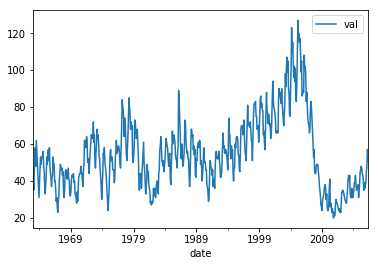

In [22]:
#don't need x axis set because we have the year set to the index 
df.plot(y='val')

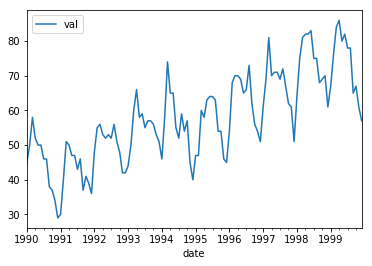

In [23]:
df['1990':'1999'].plot(y='val')


In [24]:
#let's just show everything by year...look below for resample 

## Grouping with resample, not with groupby

Hmmm, looks like something bad might have happened to the housing industry t some point. Maybe we want to see some numbers instead of a graph? To do aggregate statistics on time series in pandas we use a method called `.resample()`, and we're going to tell it **to group the data by year.**

When we tell it to group by year, we need to give it a **special code**. I always get mine from this StackOverflow post http://stackoverflow.com/a/17001474 because it's much more convenient than the pandas documentation.

In [25]:
df.resample('A').mean()
#all other columns dissapear because they are strings 

,is_adj,val,cat_indent
date,,,
1963-12-31,0,46.666667,0
1964-12-31,0,47.083333,0
1965-12-31,0,47.916667,0
1966-12-31,0,38.416667,0
1967-12-31,0,40.666667,0
1968-12-31,0,40.833333,0
1969-12-31,0,37.416667,0
1970-12-31,0,40.500000,0
1971-12-31,0,54.750000,0


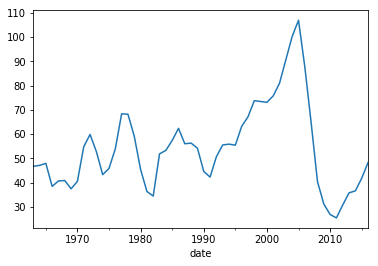

In [26]:
df['val'].resample('A').mean().plot()

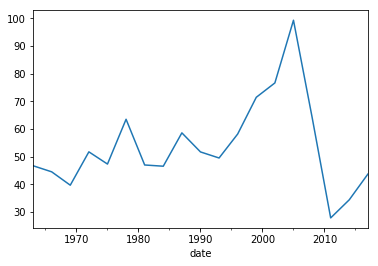

In [27]:
#every three years 
df['val'].resample('3A').mean().plot()

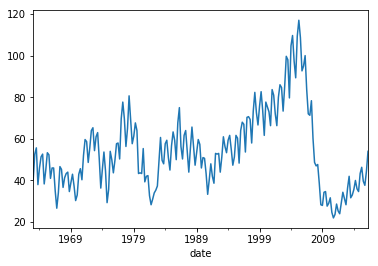

In [28]:
#quarterly
df['val'].resample('Q').mean().plot()

Notice that it's **December of every year**. That still looks like too much data, though. What if we back out to every decade?

Cool, right?

### Graphing

We can graph these instead of just look at them! Get ready!

In [29]:
#done above 

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

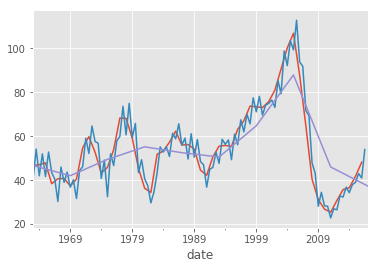

In [31]:
df['val'].resample('A').mean().plot()
df['val'].resample('2Q').mean().plot()
df['val'].resample('6A').mean().plot()

### Graphing all on one plot

We've done this before, but it's more exciting now - save the first plot as `ax` and pass it to the others as the confusingly- or conveniently-named `ax=ax`.

## Cyclical data (actually using groupby)

### What were the top 5 worst months?

In [32]:
df.sort_values(by='val').head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
2010-11-01,0,20.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-11-01
2011-01-01,0,21.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2011-01-01
2011-02-01,0,22.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2011-02-01
2010-08-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-08-01
2010-10-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-10-01


It seems like there might be a cycle ever year. Maybe houses are sold in the summer and not the winter? To do this we can't use resample - it's for putting time into buckets - we need to **group by the month.**

### Getting the month

We can't ask for the index column as "year" any more, but we can just use `df.index` instead.

In [33]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             8,  9, 10, 11, 12,  1,  2,  3,  4,  5],
           dtype='int64', name='date', length=641)

To get the month of each date, it's simply `df.index.month`.

### Doing the groupby to view data by month

So when we do our groupby, we'll say **hey, we made the groups for you already**. Then we ask for the median number of houses sold.

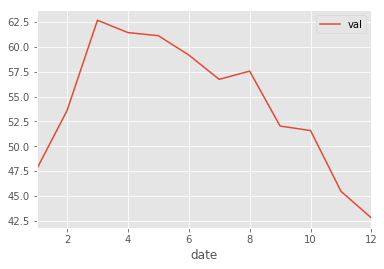

In [34]:
#groupby index based on month. Variation of a variable (months over the year...something like that)
df.groupby(by=df.index.month).mean().plot(y='val')

### Plot the results

# More details

You can also use **max** and **min** and all of your other aggregate friends with `.resample`. For example, what's the **largest number of houses hold in a given year?**

In [35]:
df.val.resample?

In [36]:
#grouping by year 
df['val'].resample('A').sum()

date
1963-12-31     560.0
1964-12-31     565.0
1965-12-31     575.0
1966-12-31     461.0
1967-12-31     488.0
1968-12-31     490.0
1969-12-31     449.0
1970-12-31     486.0
1971-12-31     657.0
1972-12-31     718.0
1973-12-31     633.0
1974-12-31     519.0
1975-12-31     550.0
1976-12-31     647.0
1977-12-31     820.0
1978-12-31     818.0
1979-12-31     709.0
1980-12-31     545.0
1981-12-31     436.0
1982-12-31     413.0
1983-12-31     622.0
1984-12-31     639.0
1985-12-31     688.0
1986-12-31     748.0
1987-12-31     672.0
1988-12-31     675.0
1989-12-31     650.0
1990-12-31     535.0
1991-12-31     507.0
1992-12-31     608.0
1993-12-31     666.0
1994-12-31     670.0
1995-12-31     665.0
1996-12-31     758.0
1997-12-31     805.0
1998-12-31     885.0
1999-12-31     881.0
2000-12-31     877.0
2001-12-31     909.0
2002-12-31     972.0
2003-12-31    1088.0
2004-12-31    1203.0
2005-12-31    1283.0
2006-12-31    1052.0
2007-12-31     776.0
2008-12-31     485.0
2009-12-31     374.0
2010-12-

In [37]:
#sorting series by index or by values 

In [38]:
df['val'].resample('A').sort_values(ascending=False).head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called sort_values(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


date
2005-12-31    106.916667
2004-12-31    100.250000
2003-12-31     90.666667
2006-12-31     87.666667
2002-12-31     81.000000
Name: val, dtype: float64

How about the fewest?

In [39]:
df['val'].resample('A').sort_values().head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called sort_values(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


date
2011-12-31    25.416667
2010-12-31    26.833333
2012-12-31    30.750000
2009-12-31    31.166667
1982-12-31    34.416667
Name: val, dtype: float64

Since we're feeling crazy, why don't we plot the **average, max and min for each year?**

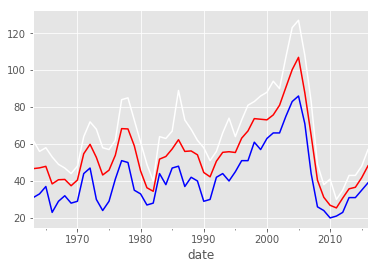

In [40]:
df['val'].resample('A').mean().plot(color='red')
df['val'].resample('A').max().plot(color='white')
df['val'].resample('A').min().plot(color='blue')

In [41]:
# df['val'].agg(['min'])

## Using `.fill_between` to draw between lines

Getting maximums and minimums for years is a very common way of dealing with resampled time series. A fun graph to make is the `fill_between` graph, which colors between two areas.

### Step 1: Calculate the maxes and mins and get a list of x values

`ax.fill_between` requires three things

    - a list of x values (the dates),
    - a list of minimum values for those x values,
    - and a list of maximum values for those x values

In [42]:
#x values are in the index...so grab them 
df.resample('A').index

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  


DatetimeIndex(['1963-12-31', '1964-12-31', '1965-12-31', '1966-12-31',
               '1967-12-31', '1968-12-31', '1969-12-31', '1970-12-31',
               '1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31',
               '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31',
               '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31',
               '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31',
               '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31',
               '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
               '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31'],
              dtype='datetime64[n

In [43]:
y_maxes = df['val'].resample('A').max()
y_mins = df['val'].resample('A').min()
y_maxes.head()


date
1963-12-31    62.0
1964-12-31    56.0
1965-12-31    58.0
1966-12-31    53.0
1967-12-31    49.0
Freq: A-DEC, Name: val, dtype: float64

### Step 2: Build the graph

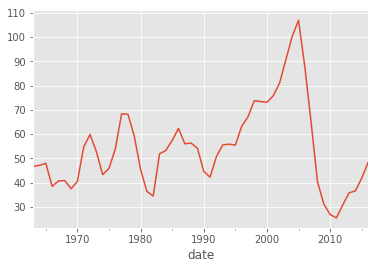

In [44]:
df['val'].resample('A').mean().plot()

### Step 3: Add the fill

`ax.fill_between` requires three things

    - a list of x values
    - a list of minimum values
    - and a list of maximum values

We have all of those, so let's draw it!

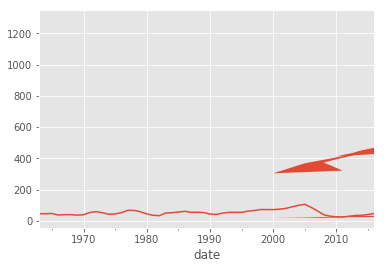

In [45]:
y_maxes = df['val'].resample('A').max()
y_mins = df['val'].resample('A').min()
x_values = df['val'].resample('A').sum()
ax = df['val'].resample('A').mean().plot()
ax.fill_between(y_maxes, y_mins, x_values)

In [46]:
### LET'S DO PERCENT CHANGE ON A GRAPH 